# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## This notebook was last tested with IPython notebook 4.1.0 using Python 2.7
### (If you have trouble running this notebook, please check version compatibility)

## First, do the necessary set-up (run the code block below, first)

In [4]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from ipywidgets import interact, interact_manual, fixed
from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import Implementation as imp
%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Mid)

available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)

# The High Priority Science Objective list below includes the HPSOs that were originally intended for 
# The Survey telescope. These have since been reassigned to Mid.
available_hpsos = [HPSOs.hpso_max_Low_c, HPSOs.hpso_max_Low_s, HPSOs.hpso_max_Mid_c, HPSOs.hpso_max_Mid_s, 
                   HPSOs.hpso_max_band5_Mid_c, HPSOs.hpso_max_band5_Mid_s, 
                   HPSOs.hpso01c, HPSOs.hpso01s, HPSOs.hpso02A, HPSOs.hpso02B, HPSOs.hpso14, HPSOs.hpso14c, HPSOs.hpso14s, 
                   HPSOs.hpso22, HPSOs.hpso37a, HPSOs.hpso37b, HPSOs.hpso38a, HPSOs.hpso38b, 
                   HPSOs.hpso13c, HPSOs.hpso13s, HPSOs.hpso15c, HPSOs.hpso15s, 
                   HPSOs.hpso27, HPSOs.hpso33, HPSOs.hpso37c]

available_hpsos.sort()

available_modes     = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg)
available_modes_all = available_modes + (ImagingModes.All,)
verbose_display = False

## Using default values, we can compare telescopes side-by-side

Max baseline = 80000
Max baseline = 150000


Telescope,SKA1_Low_rebaselined,SKA1_Mid_rebaselined,
Band,Low,Mid1,
Mode,Spectral,Spectral,
Baseline Dependent Time Avg.,True,True,
Max Baseline,80000,150000,m
Max # channels,65536,65536,
Optimal Number of Facets,1,5,
Optimal Snapshot Time,149.4,543.4,sec.
Image side length,24530,28523,pixels
Visibility Buffer,19.8,18.7,PetaBytes
Working (cache) memory,35.7,7.31e+03,TeraBytes


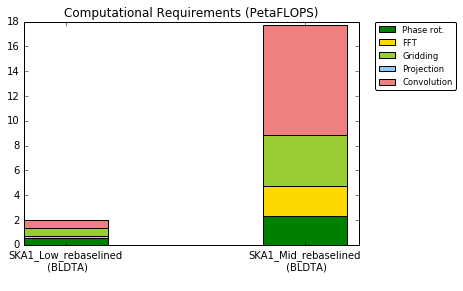

In [6]:
interact_manual(iapi.compare_telescopes_default, 
                telescope_1=available_teles, telescope_2=available_teles, band_1=available_bands,
                band_2=available_bands, mode_1=available_modes_all, mode_2=available_modes_all,
                verbose=verbose_display);

## Using default values, can compute results for the High Priority Science Objectives

HPSO Number,15c
Telescope,SKA1_Mid_rebaselined
Mode,Continuum
Max Baseline,150000 m
Max # of channels,65536
Observation time,4 hr 24 min 0 sec
Texp (not used in calc),12600 hr 0 min 0 sec
Tpoint (not used in calc),4 hr 24 min 0 sec


Inefficiency Warning: reassigning already-defined parameter "%s" with an identical value.


Optimal Number(s) of Facets,3
Optimal Snapshot Time(s),414.3 sec.
Image side length(s),78025 pixels
Visibility Buffer,4.51 PetaBytes
Working (cache) memory,1.57e+03 TeraBytes
I/O Rate,14.1 TeraBytes/s
Total Compute Requirement,20.2 PetaFLOPS
-> Gridding,6.39 PetaFLOPS
-> FFT,10.4 PetaFLOPS
-> Phase Rotation,0.00657 PetaFLOPS
-> Projection,1.59 PetaFLOPS


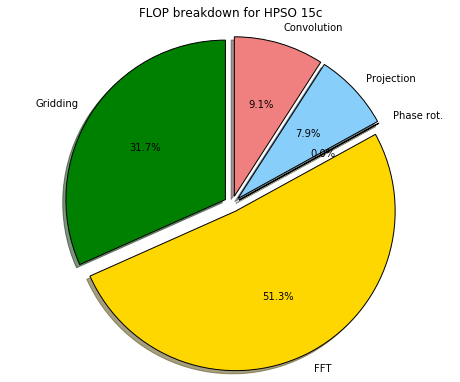

In [2]:
interact_manual(iapi.evaluate_hpso_optimized, hpso_key=available_hpsos, verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [ ]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10000,200000), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         telescope=available_teles, band=available_bands, mode=available_modes_all, verbose=verbose_display);

### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

In [ ]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10000,200000), Nf_max = (1,256000,1), telescope=available_teles, 
         band=available_bands, mode=available_modes_all, verbose=verbose_display);

## illustrating 1D "parameter sweep" + visualization functionality.

Starting sweep of parameter Bmax, evaluating expression Rflop over range (10000, 150000) in 20 steps (i.e. 21 data points)
Image Characteristics:
----------------------

Facet FOV:  0.0235785100876882*(0.903239311623932*sign(N_facet - 1) + 4.51619655811966)/N_facet  rads
PSF size:   4.97761431429680e-6  rads
Pixel size: 1.65920477143227e-6  rads
No. pixels on facet side: 14210.7294371717*(0.903239311623932*sign(N_facet - 1) + 4.51619655811966)/N_facet
Epsilon approx : 0.342997170285018
Found Qbw =    4.286, and cell frac error, epsilon,     0.343
Max subband ratio 1.35
Subband Freq ratio used: 1.31607401295
Number subbands use in imaging 4.0
Maximum baseline 150000
Station (or antenna) diameter 13.5
Number of stations (or antennas) 197

---------------------

Channelization Characteristics:
-------------------------------

Ionospheric timescale (for updating kernels and limiting any time averaging):  10.0  sec
Coalesce Time predict:  Min(1.2, 0.14*Max(1.0, floor(180169.468625599/Bmax,b

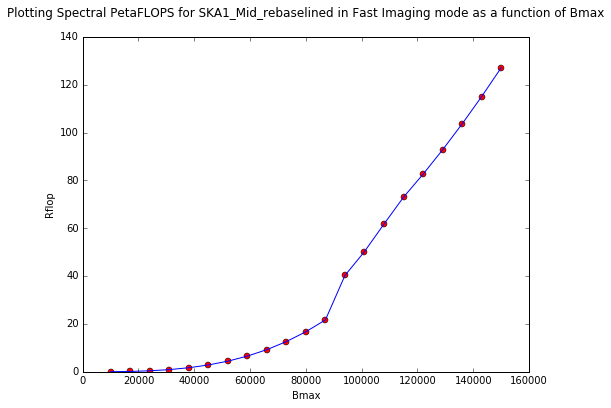

10000.0 , 0.0357428064356
17000.0 , 0.15064420628
24000.0 , 0.418950203518
31000.0 , 0.910088802417
38000.0 , 1.69641381484
45000.0 , 2.84823594086
52000.0 , 4.44194072982
59000.0 , 6.55533760998
66000.0 , 9.25769632192
73000.0 , 12.6299050262
80000.0 , 16.751321805
87000.0 , 21.6916747569
94000.0 , 40.2851407295
101000.0 , 50.2664488461
108000.0 , 61.7981660754
115000.0 , 73.0299721213
122000.0 , 82.6251478275
129000.0 , 92.8253508503
136000.0 , 103.658406322
143000.0 , 115.089584165
150000.0 , 127.159015803


In [5]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'Bmax'
param_val_min =10000
param_val_max = 150000
number_steps = 20
telescope = Telescopes.SKA1_Mid
immode = ImagingModes.FastImg
band=Bands.Mid1

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(param_values, results) = iapi.eval_param_sweep_1d(telescope, immode, band=band, 
                                                   expression=expression, parameter=parameter, param_val_min=param_val_min,
                                                   param_val_max=param_val_max, number_steps=number_steps, verbose=True)
header = 'Plotting Spectral PetaFLOPS for %s in %s mode as a function of %s' % (telescope, immode, parameter)
iapi.plot_line_datapoints(header, param_values, np.array(results)/c.peta, xlabel=parameter, ylabel=expression)

for i in range(len(param_values)):
               print param_values[i], ",", (results[i])/c.peta

## illustrating 2D "parameter sweep" + visualization functionality.

Evaluating expression Rflop while
sweeping parameters B_max and Qfov over 2D domain [10000, 150000] x [0.7, 1.8] in 10 steps each,
for a total of 121 data evaluation points
> 0.0% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 0.7)
> 0.8% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 0.81)
> 1.7% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 0.92)
> 2.5% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 1.03)
> 3.3% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 1.14)
> 4.1% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 1.25)
> 5.0% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 1.36)
> 5.8% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 1.47)
> 6.6% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 1.58)
> 7.4% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 1.69)
> 8.3% done: Evaluating Rflop for (B_max, Qfov) = (10000.0, 1.8)
> 9.1% done: Evaluating Rflop for (B_max, Qfov) = (24000.0, 0.7)
> 9.9% done: Evaluating Rflop for (B_m

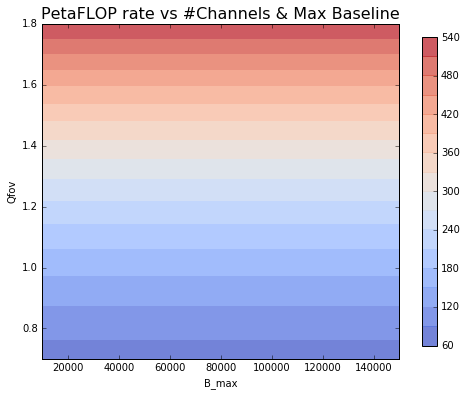

ValueError: Unknown projection '3d'

In [3]:
from IPython.display import display, HTML

telescope = Telescopes.SKA1_Mid
band = Bands.Mid1
immode = ImagingModes.FastImg
expression = 'Rflop'
parameters = ('B_max', 'Qfov')
parameter_ranges = ((10000,150000),(0.7,1.8))
number_steps = 10
verbose = False

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(p1_values, p2_values, results) = iapi.eval_param_sweep_2d(telescope, immode, band=band, 
                                                           expression=expression, parameters=parameters, 
                                                           params_ranges=parameter_ranges, number_steps=number_steps, 
                                                           verbose=verbose)


iapi.plot_2D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], contours=np.array((0.5, 1.0)))
iapi.plot_3D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], zlabel=expression, contours=np.array((0.5, 1.0)))